# Predicting Cardiovascular Risk Using Supervised Machine Learning Algorithms


### Table of Content
- Overview
- Import Libraries
- Import dataset
- EDA
- Data Preparation
    - Data Split 75:25
    - Scaling
- Models and Evaluation
    - Linear Regression
    - KNN Classifier
    - Linear SVM
    - Naive Bayes
    - Random Forest
    - XGBoost
- Conclusion

### Overview of the Project
- The main objective of this project is to predict the presence/absence of risk of cardiovascular disease. This dataset was given by our professor and similar data sets are available in GitHub and kaggle.
- I used Supervised machine learning algorithms to predict the cardio disease.

### Libraries

In [1]:
# Importing Machine Learning required libraries
import pandas as pd # Data Pre-processing
import numpy as np # linear Algebra
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Plotting

### Importing data

In [2]:
# Using pandas importing "cleaned" data csv
df = pd.read_csv("CVD_risk.csv")

### EDA

#### Glimpse of data - Top 5 rows
##### variables
1.	Age | Objective Feature | age | int (days)
2.	Height | Objective Feature | height | int (cm) |
3.	Weight | Objective Feature | weight | float (kg) |
4.	Gender | Objective Feature | gender | categorical code | 1:women and 2: men
5.	Systolic blood pressure | Examination Feature | ap_hi | int |
6.	Diastolic blood pressure | Examination Feature | ap_lo | int |
7.	Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8.	Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9.	Smoking | Subjective Feature | smoke | binary |
10.	Alcohol intake | Subjective Feature | alco | binary |
11.	Physical activity | Subjective Feature | active | binary |
12.	Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [3]:
df.head() # Using head function displaying the top 5 rows of the dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


#### Shape of the dataframe

In [4]:
df.shape

(70000, 13)

In [5]:
# Converting number of days into years in age column
df['age'] = df['age']/365
df['age'] = df['age'].astype(int)

#### Data variable types and statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int32
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int32(1), int64(12)
memory usage: 6.7 MB


In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205543,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395829,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### Checking null values

In [8]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
df.isnull().values.any()

False

#### Checking Duplicates

In [10]:
df = df.drop(["id"], axis =1) # Dropping ID column from the dataframe

In [11]:
df.duplicated().sum() # Sum of duplicates in the dataframe

3211

In [12]:
df.drop_duplicates(inplace = True) # Drop the duplicate values

In [13]:
df.duplicated().sum() # Sum of duplicates in the dataframe

0

In [14]:
df.shape

(66789, 12)

#### Replace values / Label Encoding

In [15]:
# Replacing the values in the gender column with 0,1 for 1,2 respectively
df['gender'] = df['gender'].replace([1,2],[0,1])

In [16]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168,62,110,80,1,1,0,0,1,0
1,55,0,156,85,140,90,3,1,0,0,1,1
2,51,0,165,64,130,70,3,1,0,0,0,1
3,48,1,169,82,150,100,1,1,0,0,1,1
4,47,0,156,56,100,60,1,1,0,0,0,0


#### Outliers

<AxesSubplot:>

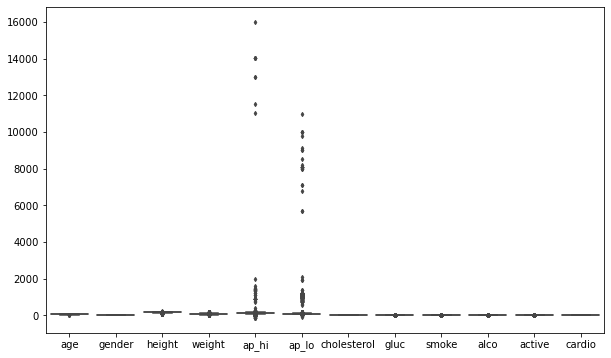

In [17]:
# Using seaborn boxplot identifying the outliers in all the columns
plt.figure(figsize=(10,6))
sns.boxplot(data=df,fliersize=3)

In [18]:
# removing the outliers from "ap_lo" ,"ap_hi","weight" columns by defining the range
outlier = ((df["ap_hi"]>200) | (df["ap_lo"]>180) | (df["ap_lo"]<50) | (df["ap_hi"]<=80) | (df["height"]<=100)
             | (df["weight"]<=28) )
print("There are {} outlier".format(df[outlier]["cardio"].count()))

There are 1449 outlier


In [19]:
df = df[~outlier]

#### Correlation between the variables

<AxesSubplot:>

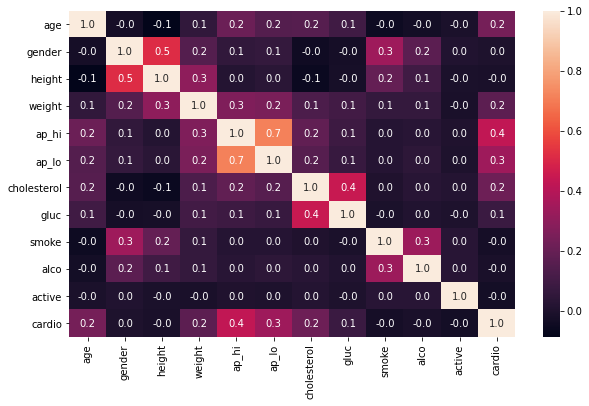

In [20]:
corr_mat = df.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr_mat, xticklabels = corr_mat.columns.values, yticklabels = corr_mat.columns.values, annot= True, fmt ='.1f')

#### Exploring the target variable

In [21]:
# Checking for the data balance by counting the values in "cardio" column (target variable)
df["cardio"].value_counts()

1    33148
0    32192
Name: cardio, dtype: int64

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


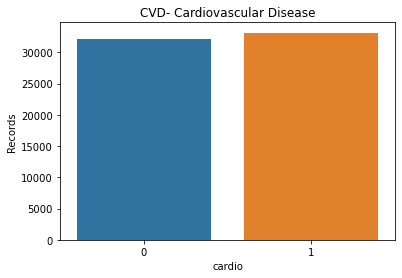

In [22]:
# Using seaborn plotting target variable
sns.countplot(df["cardio"])
plt.xlabel("cardio")
plt.ylabel("Records")
plt.title("CVD- Cardiovascular Disease")
plt.show()

#### Finding effects of features on target

##### Age vs Cardio

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

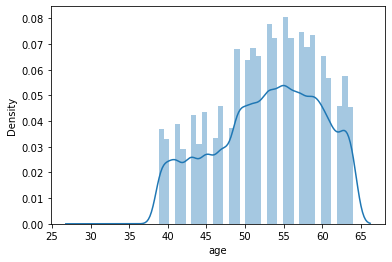

In [23]:
# Age distribution plot
sns.distplot(df['age'])

<AxesSubplot:xlabel='cardio', ylabel='age'>

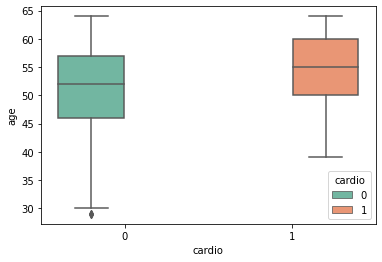

In [24]:
# Using boxplot plotting target variable ('cardio') over age
sns.boxplot(y = 'age', x = 'cardio',data = df, palette = 'Set2',hue = 'cardio')


Text(0.5, 1.0, 'Age Distribution among Gender')

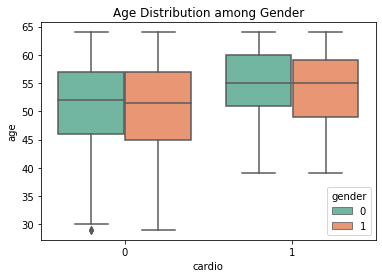

In [25]:
# Age distribution among Gender over cardio
sns.boxplot(x="cardio", hue="gender", y="age", data=df, palette = 'Set2')
plt.title("Age Distribution among Gender")

##### Weight vs Cardio

<AxesSubplot:xlabel='cardio', ylabel='weight'>

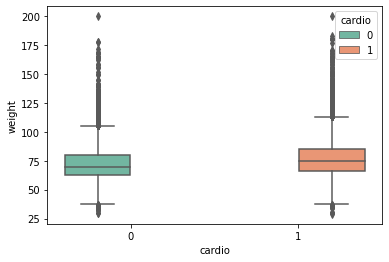

In [26]:
# Checking the weights of patients over "cardio" column
sns.boxplot(y = 'weight', x = 'cardio',data = df, palette = 'Set2',hue = 'cardio')

#### Distribution of categorical variables

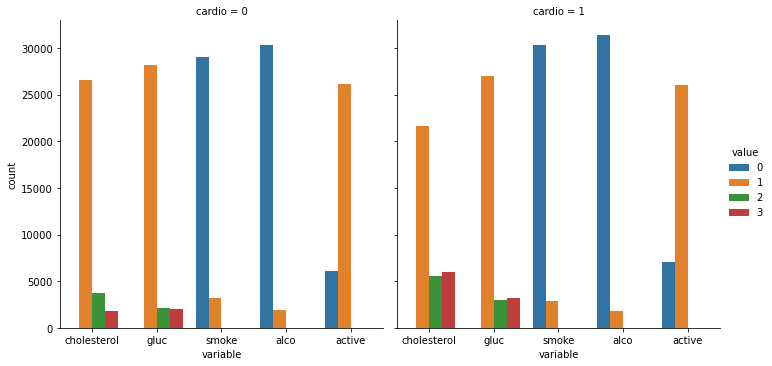

In [27]:
# Distribution of categorical variables over target variable
df1 = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio", data=df1, kind="count")


#### Extracting data having CVD (Cardiovascular disease)
- To get more insights from the data having cardio, extracting only the samples having cardio and performing EDA as same above.

In [28]:
cardio_yes = df[df.cardio == 1]

In [29]:
# Glimpse of the extracted cardio data
cardio_yes.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,55,0,156,85,140,90,3,1,0,0,1,1
2,51,0,165,64,130,70,3,1,0,0,0,1
3,48,1,169,82,150,100,1,1,0,0,1,1
7,61,1,178,95,130,90,3,3,0,0,1,1
15,45,1,172,112,120,80,1,1,0,0,0,1


In [30]:
# Shape of the cardio data 
cardio_yes.shape

(33148, 12)

In [31]:
# Checking for null values
cardio_yes.isnull().values.any()

False

In [32]:
# Statistics of cardio data
cardio_yes.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,33148.000000,33148.000000,33148.000000,33148.000000,33148.000000,33148.000000,33148.000000,33148.000000,33148.000000,33148.000000,33148.000000,33148.0
mean,54.432907,0.355587,164.295312,76.917280,134.002594,84.676692,1.526155,1.282611,0.085194,0.052944,0.786171,1.0
std,6.382702,0.478698,8.135394,14.909345,17.142089,9.756674,0.780381,0.629100,0.279174,0.223926,0.410014,0.0
min,39.000000,0.000000,104.000000,29.000000,85.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0
25%,50.000000,0.000000,159.000000,66.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0
50%,55.000000,0.000000,164.000000,75.000000,130.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0
75%,60.000000,1.000000,170.000000,85.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.0
max,64.000000,1.000000,250.000000,200.000000,200.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.0


##### Age distribution

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

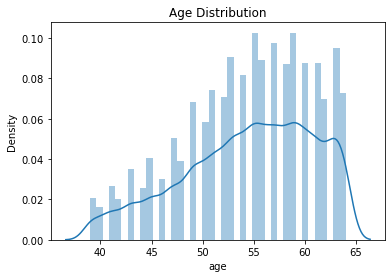

In [33]:
sns.distplot(cardio_yes['age']) # usning seaborn plotting the age distribution
plt.title("Age Distribution")

Text(0.5, 1.0, 'Age Distribution')

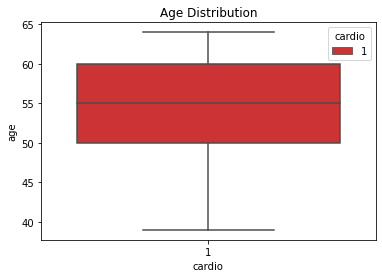

In [34]:
# Age distribution of patients who are having cardio
sns.boxplot(y = 'age', x = 'cardio',data = cardio_yes, palette = 'Set1',hue = 'cardio') 
plt.title("Age Distribution")

Text(0.5, 1.0, 'Weight Distribution')

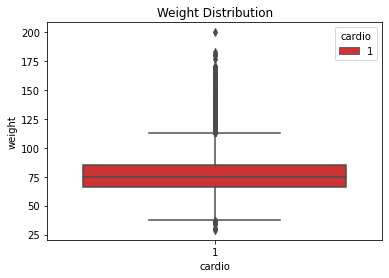

In [35]:
# Weight distribution of patients who are having cardio
sns.boxplot(y = 'weight', x = 'cardio',data = cardio_yes, palette = 'Set1',hue = 'cardio') 
plt.title("Weight Distribution")

##### Gender distribution over target variable

In [36]:
# Count of each gender, where 1 = Female, 2 = Male
cardio_yes["gender"].value_counts()

0    21361
1    11787
Name: gender, dtype: int64

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


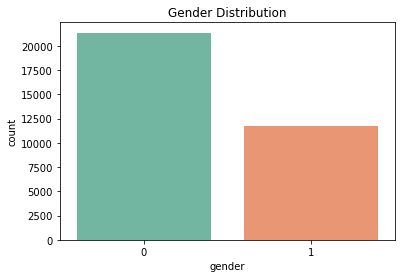

In [37]:
# Gender distribution plot

sns.countplot(cardio_yes["gender"],palette = 'Set2')
plt.xlabel("gender")
plt.ylabel("count")
plt.title("Gender Distribution")
plt.show()

In [38]:
# Gender wise consumption of alcohol who's having CVD. 

cardio_yes.groupby('gender')['alco'].value_counts()

gender  alco
0       0       20802
        1         559
1       0       10591
        1        1196
Name: alco, dtype: int64

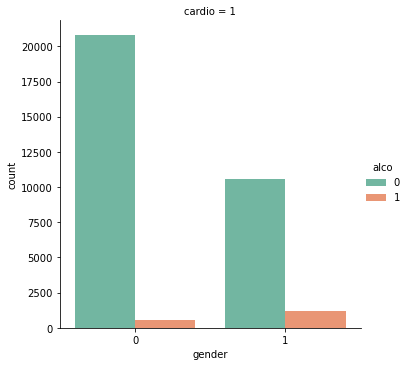

In [39]:
# Plotting gender wise consumption of alcohol
sns.catplot(x="gender", hue="alco", col="cardio", data=cardio_yes, kind="count", palette = 'Set2')

In [40]:
# Gender wise smokers and non-smokers
cardio_yes.groupby('gender')['smoke'].value_counts()

gender  smoke
0       0        20988
        1          373
1       0         9336
        1         2451
Name: smoke, dtype: int64

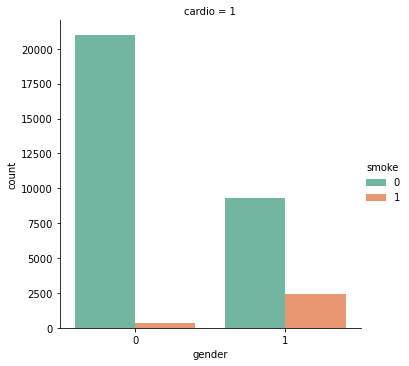

In [41]:
# Plotting gender wise smokers and non smokers
sns.catplot(x="gender", hue="smoke", col="cardio", data=cardio_yes, kind="count", palette = 'Set2')

In [42]:
# Gender wise physical activity
cardio_yes.groupby('gender')['active'].value_counts()

gender  active
0       1         16804
        0          4557
1       1          9256
        0          2531
Name: active, dtype: int64

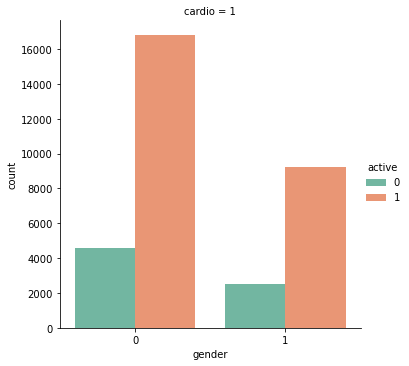

In [43]:
# Plotting gender wise physical activity
sns.catplot(x="gender", hue="active", col="cardio", data=cardio_yes, kind="count", palette = 'Set2')

### Data Preparation


#### Data Split

In [44]:
# Importing the required packages for building the model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Splitting the data Training and Testing sets using train_test_split 

X = df.drop(["cardio"],1)
y = df["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)



##### Train Data

In [45]:
X_train # Train features

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
48765,43,1,176,63,100,80,1,3,0,0,1
15766,60,0,149,80,130,80,3,3,0,0,0
50696,53,0,156,93,140,80,2,2,0,0,1
2225,46,1,170,64,110,80,1,1,0,0,1
3466,39,0,155,85,110,70,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
48590,64,0,162,63,145,90,2,1,0,0,1
55710,53,0,162,71,140,90,1,1,0,0,1
44990,43,1,171,82,120,60,3,3,0,0,1
46058,41,1,159,60,110,70,1,1,1,0,0


In [46]:
X_train.shape # Train features shape

(49005, 11)

In [47]:
y_train # Train target

48765    0
15766    1
50696    1
2225     0
3466     1
        ..
48590    1
55710    1
44990    1
46058    0
2799     1
Name: cardio, Length: 49005, dtype: int64

In [48]:
y_train.shape  # Train Target shape

(49005,)

In [49]:
y_train.value_counts()

1    24848
0    24157
Name: cardio, dtype: int64

##### Test Data

In [50]:
X_test # Test data features

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
6517,46,0,168,65,110,69,1,1,0,0,0
68187,61,0,154,69,160,100,2,1,0,0,1
28668,39,0,160,90,150,90,1,1,0,0,1
46194,46,1,174,100,140,90,1,1,0,1,1
55889,57,1,174,81,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
29043,59,1,167,90,140,90,3,3,0,0,1
1022,50,1,165,62,150,90,1,1,0,0,1
4594,55,0,169,74,170,100,1,1,0,0,1
55743,48,0,158,65,150,90,2,1,0,0,1


In [51]:
X_test.shape # Test data features shape

(16335, 11)

In [52]:
y_test # Test data target

6517     0
68187    0
28668    1
46194    1
55889    1
        ..
29043    1
1022     0
4594     0
55743    0
16206    0
Name: cardio, Length: 16335, dtype: int64

In [53]:
y_test.shape # Test data target shape

(16335,)

#### Scaling

In [54]:
# Scaling the data by using MinMaxScaler and fitting the train data

scaler = MinMaxScaler()
scaler.fit(X_train)

# Transforming the data

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Models
##### Logistic Regression

---Metrics---
accuracy: 0.7322
Precision: 0.7576
Recall: 0.6954
f1_Score: 0.7252


Text(69.0, 0.5, 'Actual')

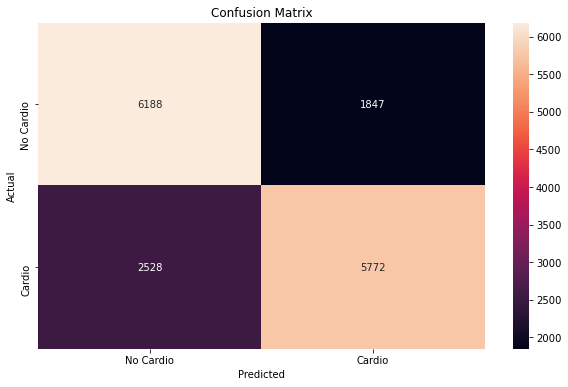

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Fitting the model with train data
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_scaled, y_train)

# Predicting the target
lr_pred = classifier.predict(X_test_scaled)

#Evaluating the Results
print("---Metrics---")
print("accuracy: %.4f" %accuracy_score(y_test, lr_pred))
print("Precision: %.4f" %precision_score(y_test, lr_pred))
print("Recall: %.4f" %recall_score(y_test, lr_pred))
print("f1_Score: %.4f" %f1_score(y_test, lr_pred))

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test, lr_pred)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('No Cardio', 'Cardio'), columns = ('No Cardio', 'Cardio'))
plt.figure(figsize = (10, 6)) 
plt.title('Confusion Matrix') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

##### KNN Classifier

---Metrics---
accuracy: 0.7149
Precision: 0.7260
Recall: 0.7051
f1_Score: 0.7154


Text(69.0, 0.5, 'Actual')

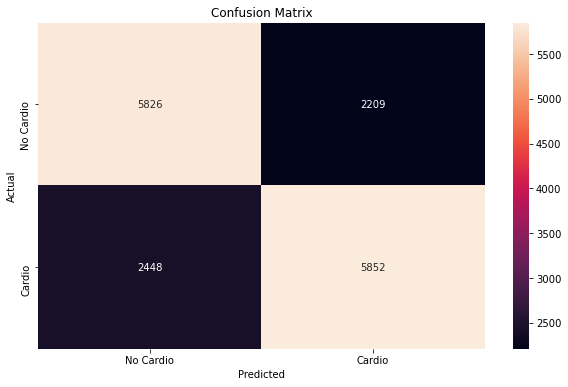

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Fitting the model with train data
knn_clf = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
knn_clf.fit(X_train_scaled, y_train)

# Predicting the target
knn_pred = knn_clf.predict(X_test_scaled)

#Evaluating the Results
print("---Metrics---")
print("accuracy: %.4f" %accuracy_score(y_test, knn_pred))
print("Precision: %.4f" %precision_score(y_test, knn_pred))
print("Recall: %.4f" %recall_score(y_test, knn_pred))
print("f1_Score: %.4f" %f1_score(y_test, knn_pred))

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test, knn_pred)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('No Cardio', 'Cardio'), columns = ('No Cardio', 'Cardio'))
plt.figure(figsize = (10, 6)) 
plt.title('Confusion Matrix') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

##### SVM

---Metrics---
accuracy: 0.7287
Precision: 0.7721
Recall: 0.6612
f1_Score: 0.7124


Text(69.0, 0.5, 'Actual')

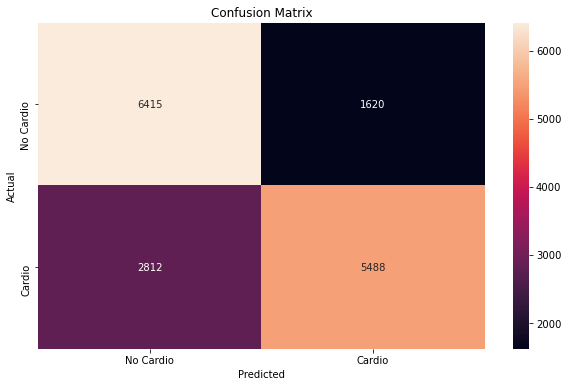

In [57]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Fitting the model with train data
lnr_svm = SVC(kernel='linear',C=1)
lnr_svm.fit(X_train_scaled, y_train)

# Predicting the target
svm_pred = lnr_svm.predict(X_test_scaled)

#Evaluating the Results
print("---Metrics---")
print("accuracy: %.4f" %accuracy_score(y_test, svm_pred))
print("Precision: %.4f" %precision_score(y_test, svm_pred))
print("Recall: %.4f" %recall_score(y_test, svm_pred))
print("f1_Score: %.4f" %f1_score(y_test, svm_pred))

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test, svm_pred)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('No Cardio', 'Cardio'), columns = ('No Cardio', 'Cardio'))
plt.figure(figsize = (10, 6)) 
plt.title('Confusion Matrix') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

##### Naive Bayes

---Metrics---
accuracy: 0.7115
Precision: 0.7654
Recall: 0.6234
f1_Score: 0.6871


Text(69.0, 0.5, 'Actual')

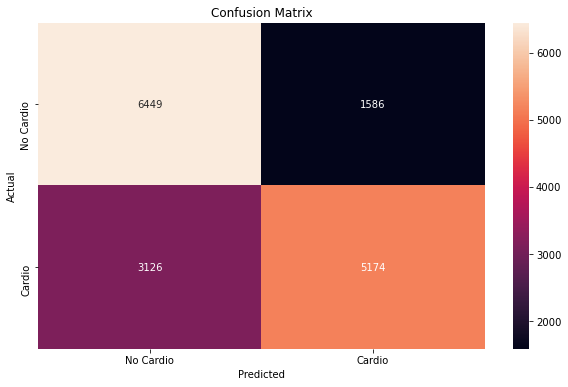

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Fitting the model with train data
gnb=GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Predicting the target
gnb_pred = gnb.predict(X_test_scaled)

#Evaluating the Results
print("---Metrics---")
print("accuracy: %.4f" %accuracy_score(y_test, gnb_pred))
print("Precision: %.4f" %precision_score(y_test, gnb_pred))
print("Recall: %.4f" %recall_score(y_test, gnb_pred))
print("f1_Score: %.4f" %f1_score(y_test, gnb_pred))

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test, gnb_pred)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('No Cardio', 'Cardio'), columns = ('No Cardio', 'Cardio'))
plt.figure(figsize = (10, 6)) 
plt.title('Confusion Matrix') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

##### Random Forest

---Metrics---
accuracy: 0.6975
Precision: 0.7037
Recall: 0.6990
f1_Score: 0.7014


Text(69.0, 0.5, 'Actual')

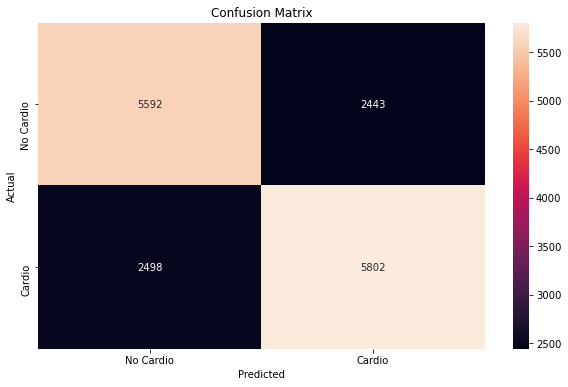

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Fitting the model with train data
rfc = RandomForestClassifier(n_jobs=-1,random_state=0)
rfc.fit(X_train_scaled, y_train)

# Predicting the target
rfc_pred = rfc.predict(X_test_scaled)

#Evaluating the Results
print("---Metrics---")
print("accuracy: %.4f" %accuracy_score(y_test, rfc_pred))
print("Precision: %.4f" %precision_score(y_test, rfc_pred))
print("Recall: %.4f" %recall_score(y_test, rfc_pred))
print("f1_Score: %.4f" %f1_score(y_test, rfc_pred))

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test, rfc_pred)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('No Cardio', 'Cardio'), columns = ('No Cardio', 'Cardio'))
plt.figure(figsize = (10, 6)) 
plt.title('Confusion Matrix') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

##### XGBoost

C:\Users\manoj\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:37:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
---Metrics---
accuracy: 0.7331
Precision: 0.7514
Recall: 0.7096
f1_Score: 0.7299


Text(69.0, 0.5, 'Actual')

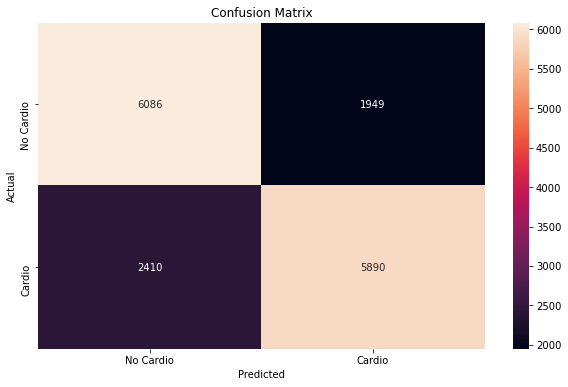

In [60]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Fitting the model with train data
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(X_train_scaled, y_train)

# Predicting the target
xgb_pred = xgb.predict(X_test_scaled)

#Evaluating the Results
print("---Metrics---")
print("accuracy: %.4f" %accuracy_score(y_test, xgb_pred))
print("Precision: %.4f" %precision_score(y_test, xgb_pred))
print("Recall: %.4f" %recall_score(y_test, xgb_pred))
print("f1_Score: %.4f" %f1_score(y_test, xgb_pred))

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test, xgb_pred)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('No Cardio', 'Cardio'), columns = ('No Cardio', 'Cardio'))
plt.figure(figsize = (10, 6)) 
plt.title('Confusion Matrix') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [61]:
# assigning all the above model accuracy's into the variables
lr_acc = accuracy_score(y_test, lr_pred)*100
knn_acc = accuracy_score(y_test, knn_pred)*100
svm_acc = accuracy_score(y_test, svm_pred)*100
gnb_acc = accuracy_score(y_test, gnb_pred)*100
rf_acc = accuracy_score(y_test, rfc_pred)*100
xgb_acc = accuracy_score(y_test, xgb_pred)*100

In [62]:
# Creating accuracy data of lists and then converting it to the dataframe
accuracy = {'Model':['Logistic Regression', 'KNN,n=9', 'SVM_Linear', 'Naive Bayes', 'Random Forest', 'XGBoost'],
           'Accuracy-75:25':[lr_acc, knn_acc, svm_acc, gnb_acc, rf_acc, xgb_acc]}
acc_df = pd.DataFrame(accuracy)
acc_df.sort_values(by = 'Accuracy-75:25', ascending = False) # sorting the accuracy values descending

,Model,Accuracy-75:25
5,XGBoost,73.314968
0,Logistic Regression,73.217019
2,SVM_Linear,72.868075
1,"KNN,n=9",71.490664
3,Naive Bayes,71.153964
4,Random Forest,69.752066


#### Data Split 80:20

In [63]:
# Importing the required packages for building the model 
from sklearn.model_selection import train_test_split

# Splitting the data Training and Testing sets using train_test_split 

X_80 = df.drop(["cardio"],1)
y_20 = df["cardio"]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_80, y_20, random_state = 0, test_size = 0.2)


#### Scaling

In [64]:
# Scaling the data by using MinMaxScaler and fitting the train data

scaler = MinMaxScaler()
scaler.fit(X_train_new)

# Transforming the data

X_train_scaled_new = scaler.transform(X_train_new)
X_test_scaled_new = scaler.transform(X_test_new)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Linear Regression
# Fitting the model with train data
classifier = LogisticRegression().fit(X_train_scaled_new, y_train_new)
# Predicting the target
lr_pred_new = classifier.predict(X_test_scaled_new)

# KNN, n=9
# Fitting the model with train data
knn_clf = KNeighborsClassifier(n_neighbors=9,n_jobs=-1).fit(X_train_scaled_new, y_train_new)
# Predicting the target
knn_pred_new = knn_clf.predict(X_test_scaled_new)

# Linear SVM
# Fitting the model with train data
lnr_svm = SVC(kernel='linear',C=1).fit(X_train_scaled_new, y_train_new)
# Predicting the target
svm_pred_new = lnr_svm.predict(X_test_scaled_new)

# Naive Bayes
# Fitting the model with train data
gnb=GaussianNB().fit(X_train_scaled_new, y_train_new)
# Predicting the target
gnb_pred_new = gnb.predict(X_test_scaled_new)

# Random Forest
# Fitting the model with train data
rfc = RandomForestClassifier().fit(X_train_scaled_new, y_train_new)
# Predicting the target
rfc_pred_new = rfc.predict(X_test_scaled_new)

# XGBoost Classifier
# Fitting the model with train data
xgb = XGBClassifier().fit(X_train_scaled_new, y_train_new)
# Predicting the target
xgb_pred_new = xgb.predict(X_test_scaled_new)


# assigning all the above model accuracy's into the variables
lr_acc_new = accuracy_score(y_test_new, lr_pred_new)*100
knn_acc_new = accuracy_score(y_test_new, knn_pred_new)*100
svm_acc_new = accuracy_score(y_test_new, svm_pred_new)*100
gnb_acc_new = accuracy_score(y_test_new, gnb_pred_new)*100
rf_acc_new = accuracy_score(y_test_new, rfc_pred_new)*100
xgb_acc_new = accuracy_score(y_test_new, xgb_pred_new)*100


# Creating accuracy data of lists and then converting it to the dataframe
accuracy_new = {'Model':['Logistic Regression', 'KNN,n=9', 'SVM_Linear', 'Naive Bayes', 'Random Forest', 'XGBoost'],
           'Accuracy-80:20':[lr_acc_new, knn_acc_new, svm_acc_new, gnb_acc_new, rf_acc_new, xgb_acc_new]}
acc_df_new = pd.DataFrame(accuracy_new)
acc_df_new.sort_values(by = 'Accuracy-80:20', ascending = False) # sorting the accuracy values descending


C:\Users\manoj\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:39:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy-80:20
0,Logistic Regression,73.270585
5,XGBoost,73.270585
2,SVM_Linear,72.933884
1,"KNN,n=9",71.326905
3,Naive Bayes,71.104989
4,Random Forest,69.635751


In [66]:
# Merging accuracy's of both the splits (75:25, 80:20) into a single dataframe
final_df = pd.merge(acc_df, acc_df_new ,on = 'Model')
final_df.sort_values(by = 'Accuracy-80:20', ascending = False)

,Model,Accuracy-75:25,Accuracy-80:20
0,Logistic Regression,73.217019,73.270585
5,XGBoost,73.314968,73.270585
2,SVM_Linear,72.868075,72.933884
1,"KNN,n=9",71.490664,71.326905
3,Naive Bayes,71.153964,71.104989
4,Random Forest,69.752066,69.635751


#### High Accuacy Models - Hyper Parameter Tuning
##### Random Forest

In [67]:
# Create a hyper parameter grid to use in the GridSearch for a RandomForestClassifier:
param_grid={'max_depth':[5,10,15],
           'max_leaf_nodes':[30,40,50],
            'min_samples_split':[20,40,50]}

Accuracy for Data Split-75:25
Test score is 73.2843587389042
Best parameters:{'max_depth': 10, 'max_leaf_nodes': 50, 'min_samples_split': 50}

Accuracy for Data Split-80:20
Test score is 73.27823691460054
Best parameters:{'max_depth': 10, 'max_leaf_nodes': 50, 'min_samples_split': 50}


Text(69.0, 0.5, 'Actual')

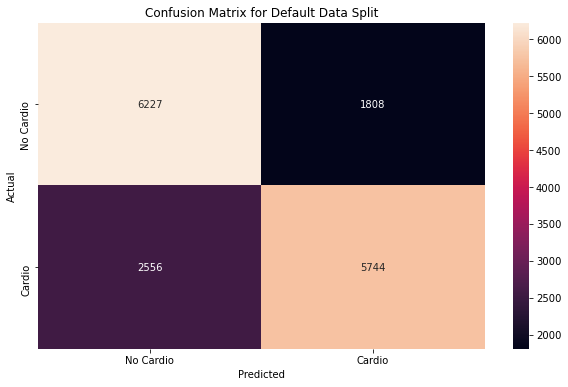

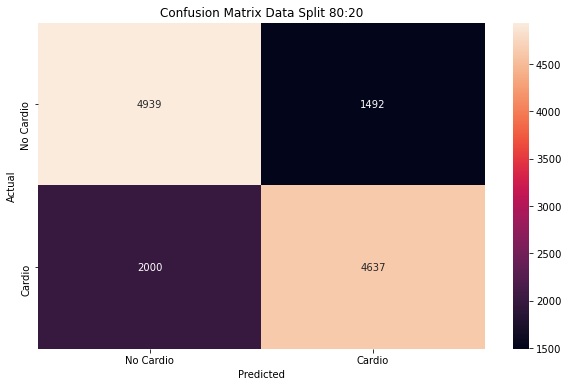

In [68]:
# Applying GridSearch on a RandomForestClassifier with a multiple parameter:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Building Model
grid_search = GridSearchCV(RandomForestClassifier(n_estimators=18,random_state=0,n_jobs=-1),param_grid,cv=10,return_train_score=True,n_jobs=-1)

grid_search.fit(X_train_scaled,y_train) # Train the model
rf_bp_pred = grid_search.predict(X_test_scaled) # Predicting the model
rf_bp = grid_search.score(X_test_scaled, y_test)*100 # Evaluate the model

print("Accuracy for Data Split-75:25")
print("Test score is "+str(grid_search.score(X_test_scaled,y_test)*100))
print("Best parameters:"+str(grid_search.best_params_))

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test, rf_bp_pred)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('No Cardio', 'Cardio'), columns = ('No Cardio', 'Cardio'))
plt.figure(figsize = (10, 6)) 
plt.title('Confusion Matrix for Default Data Split') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')


grid_search.fit(X_train_scaled_new,y_train_new) # Train the model with new data split 80:20
rf_bp_pred_new = grid_search.predict(X_test_scaled_new) # Predicting the model
rf_bp_new = grid_search.score(X_test_scaled_new, y_test_new)*100 # Evaluate the model

print("\nAccuracy for Data Split-80:20")
print("Test score is "+str(grid_search.score(X_test_scaled_new,y_test_new)*100))
print("Best parameters:"+str(grid_search.best_params_))

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test_new, rf_bp_pred_new)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('No Cardio', 'Cardio'), columns = ('No Cardio', 'Cardio'))
plt.figure(figsize = (10, 6)) 
plt.title('Confusion Matrix Data Split 80:20') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [69]:
# Create a hyper parameter grid to use in the GridSearch for a XGBoostClassifier:
param_grid_xgb={'max_depth':[5,10,15],'min_child_weight':[1,2,3]}

C:\Users\manoj\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:42:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for Data Split-75:25
Test score is 73.62718089990817
Best parameters:{'max_depth': 5, 'min_child_weight': 2}


C:\Users\manoj\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:43:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy for Data Split-80:20
Test score is 73.62258953168043
Best parameters:{'max_depth': 5, 'min_child_weight': 1}


Text(69.0, 0.5, 'Actual')

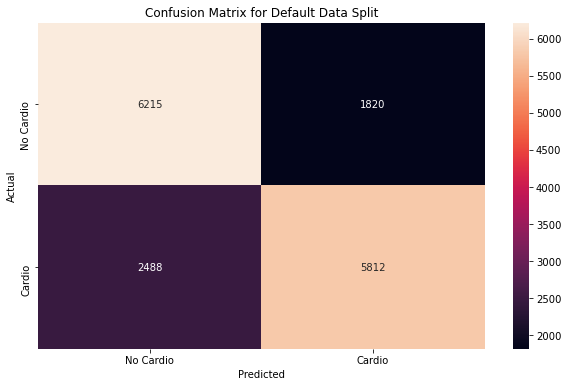

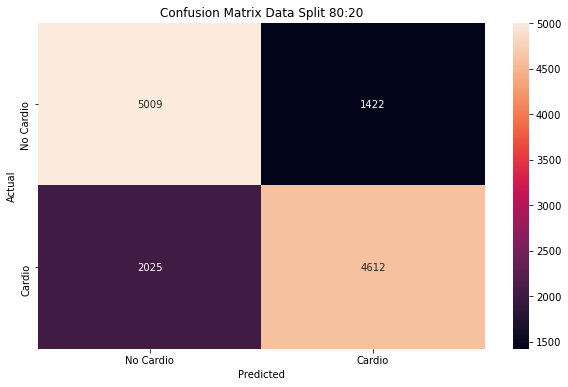

In [70]:
# Applying GridSearch on a XGBClassifier with a multiple parameter:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Building Model
grid_search_xgb = GridSearchCV(XGBClassifier(n_estimators=18,random_state=0,n_jobs=-1),param_grid_xgb,cv=10,return_train_score=True,n_jobs=-1)

grid_search_xgb.fit(X_train_scaled,y_train) # Train the model
xgb_bp_pred = grid_search_xgb.predict(X_test_scaled) # Predicting the model
xgb_bp = grid_search_xgb.score(X_test_scaled, y_test)*100 # Evaluate the model

print("Accuracy for Data Split-75:25")
print("Test score is "+str(grid_search_xgb.score(X_test_scaled,y_test)*100))
print("Best parameters:"+str(grid_search_xgb.best_params_))

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test, xgb_bp_pred)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('No Cardio', 'Cardio'), columns = ('No Cardio', 'Cardio'))
plt.figure(figsize = (10, 6)) 
plt.title('Confusion Matrix for Default Data Split') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')


grid_search_xgb.fit(X_train_scaled_new,y_train_new) # Train the model with new data split 80:20
xgb_bp_pred_new = grid_search_xgb.predict(X_test_scaled_new) # Predicting the model
xgb_bp_new = grid_search_xgb.score(X_test_scaled_new, y_test_new)*100 # Evaluate the model

print("\nAccuracy for Data Split-80:20")
print("Test score is "+str(grid_search_xgb.score(X_test_scaled_new,y_test_new)*100))
print("Best parameters:"+str(grid_search_xgb.best_params_))

# Build the confusion matrix
cnf_mtrx = confusion_matrix(y_test_new, xgb_bp_pred_new)
cnf_mtrx_df = pd.DataFrame(cnf_mtrx, index = ('No Cardio', 'Cardio'), columns = ('No Cardio', 'Cardio'))
plt.figure(figsize = (10, 6)) 
plt.title('Confusion Matrix Data Split 80:20') 
sns.heatmap(cnf_mtrx_df, annot = True, fmt ='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [71]:
# Adding accuracy's of Random Forest to the result(final_df) dataframe
final_df = final_df.append({"Model":"Random Forest with Best Parameters","Accuracy-75:25":rf_bp,"Accuracy-80:20":rf_bp_new},ignore_index=True)
final_df = final_df.append({"Model":"XGBoost with Best Parameters","Accuracy-75:25":xgb_bp,"Accuracy-80:20":xgb_bp_new},ignore_index=True)

final_df.sort_values(by = 'Accuracy-80:20', ascending = False)

,Model,Accuracy-75:25,Accuracy-80:20
7,XGBoost with Best Parameters,73.627181,73.622590
6,Random Forest with Best Parameters,73.284359,73.278237
0,Logistic Regression,73.217019,73.270585
5,XGBoost,73.314968,73.270585
2,SVM_Linear,72.868075,72.933884
1,"KNN,n=9",71.490664,71.326905
3,Naive Bayes,71.153964,71.104989
4,Random Forest,69.752066,69.635751


### Conclusion
- Though the accuracy is higher for the XGBoost classifier model with best parameters in 80:20 split ratio, the number of false negatives is lower for the Random forest classifier model with best parameters. So, random forest classifier model with best parameters is the best model for predicting the presence/absence of risk of cardiovascular disease. 